<a href="https://colab.research.google.com/github/Janaalsh5/Heart-Disease/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

In [6]:


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

possible_paths = [
    "/content/sample_data/Preprocced_data (1).csv",

]
csv_path = next((p for p in possible_paths if os.path.exists(p)), None)
if not csv_path:
    raise FileNotFoundError("Dataset not found. Place it next to your notebook.")

df = pd.read_csv(csv_path)

TARGET_COL = "HeartDisease"
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL].astype(int)

cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
    ("num", "passthrough", num_cols)
])

def make_pipeline(criterion="gini", max_depth=None, random_state=42):
    return Pipeline([
        ("prep", preprocess),
        ("clf", DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=random_state))
    ])

splits = [(0.4, "60/40"), (0.3, "70/30"), (0.2, "80/20")]
criteria = [("gini", "Gini Index"), ("entropy", "Information Gain (Entropy)")]

results = []

for test_size, split_label in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)
    for crit_key, crit_name in criteria:
        model = make_pipeline(criterion=crit_key)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        results.append({
            "Data Split": split_label,
            "Criterion": crit_name,
            "Accuracy": round(acc, 3),
            "Precision": round(prec, 3),
            "Recall": round(rec, 3),
            "F1 Score": round(f1, 3)
        })

results_df = pd.DataFrame(results)



**Gini Index and Entropy**

In [7]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #b0d6b3; font-weight: bold' if v else '' for v in is_max]

styled = (
    results_df.style
    .hide(axis="index")
    .set_caption("Decision Tree Classification Results")
    .set_table_styles([
        {"selector": "caption", "props": [("caption-side", "top"), ("font-size", "18px"), ("font-weight", "bold"), ("color", "#2F476D"), ("padding", "10px")]},
        {"selector": "th", "props": [("background-color", "#2F476D"), ("color", "white"), ("padding", "8px"), ("text-align", "center")]},
        {"selector": "td", "props": [("padding", "6px"), ("text-align", "center"), ("border", "1px solid #ddd")]},
        {"selector": "tbody tr:nth-child(even)", "props": [("background-color", "#f8f8f8")]}
    ])
    .apply(highlight_max, subset=["Accuracy", "F1 Score"], axis=0)
)

display(styled)



Data Split,Criterion,Accuracy,Precision,Recall,F1 Score
60/40,Gini Index,0.802000,0.843000,0.789000,0.815000
60/40,Information Gain (Entropy),0.780000,0.800000,0.804000,0.802000
70/30,Gini Index,0.841000,0.876000,0.830000,0.852000
70/30,Information Gain (Entropy),0.808000,0.842000,0.804000,0.823000
80/20,Gini Index,0.766000,0.786000,0.794000,0.790000
80/20,Information Gain (Entropy),0.788000,0.806000,0.814000,0.810000


**Tree**

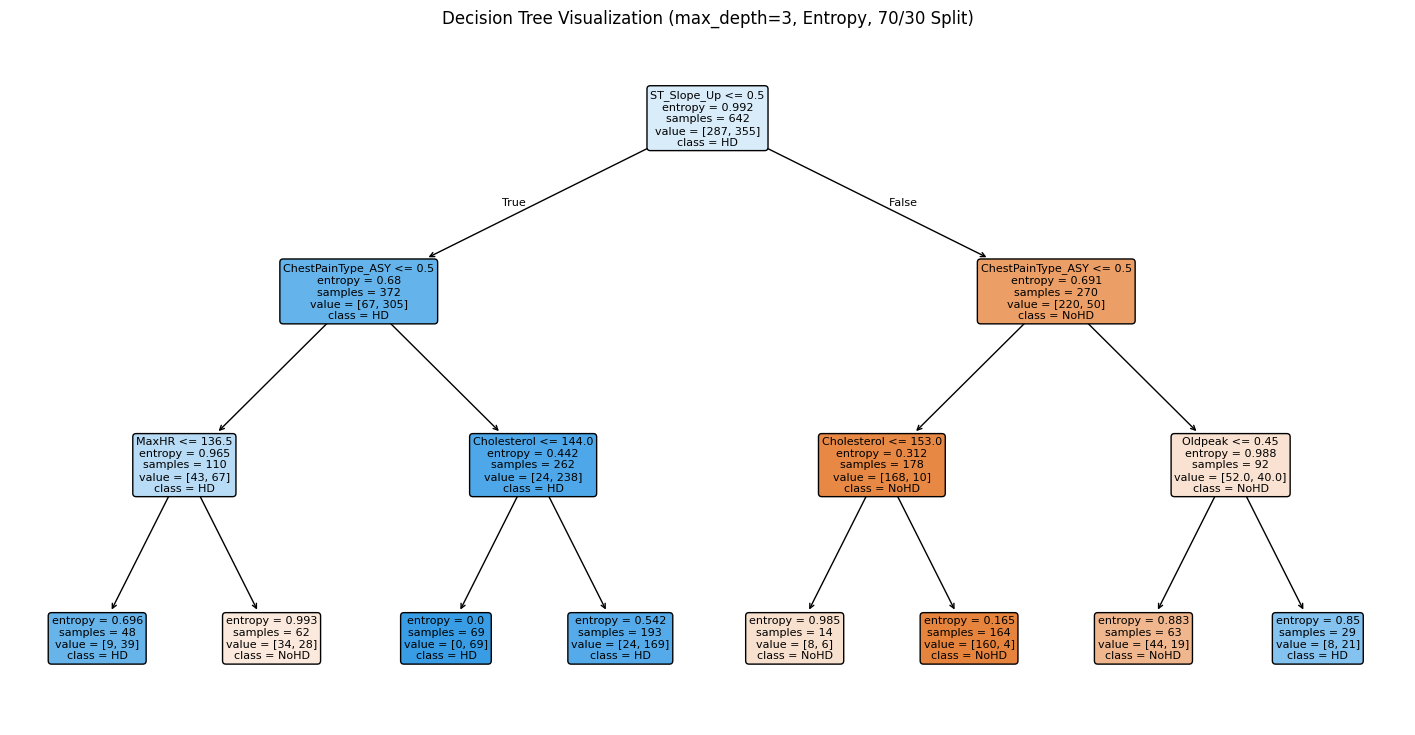

In [8]:
viz_model = make_pipeline(criterion="entropy", max_depth=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
viz_model.fit(X_train, y_train)

prep = viz_model.named_steps["prep"]
clf = viz_model.named_steps["clf"]
cat_features = prep.named_transformers_["cat"].get_feature_names_out(cat_cols)
feature_names = np.concatenate([cat_features, np.array(num_cols)])

plt.figure(figsize=(18, 9))
plot_tree(clf, feature_names=feature_names, class_names=["NoHD", "HD"], filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Visualization (max_depth=3, Entropy, 70/30 Split)")
plt.show()

# Clustering

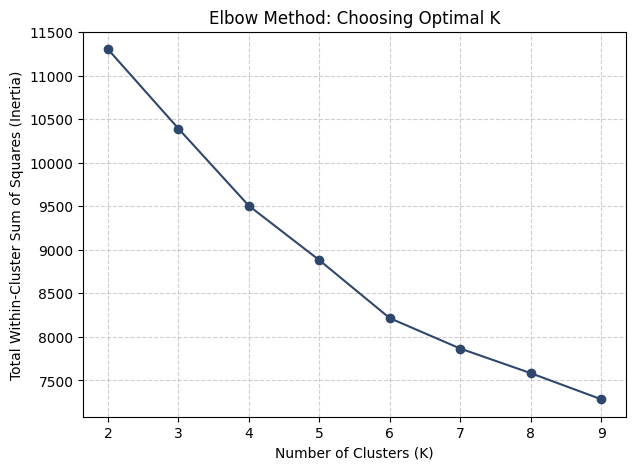

Number of Clusters (K),Silhouette Score
2,0.179000
3,0.165000
4,0.181000


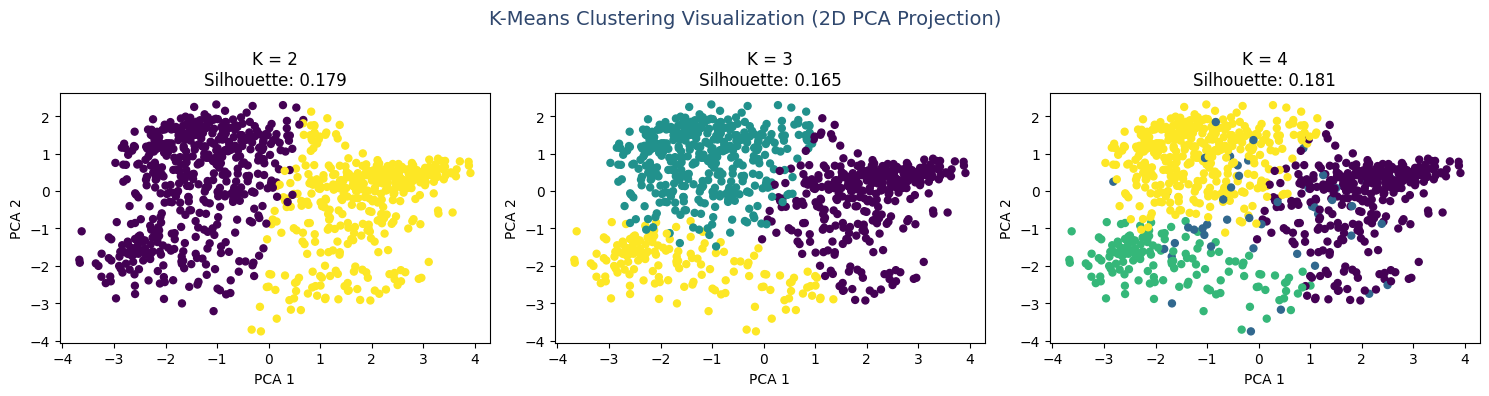

In [11]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

file_path_options = [
    "/content/sample_data/Preprocced_data (1).csv"

]
file_path = next((p for p in file_path_options if os.path.exists(p)), None)
if not file_path:
    raise FileNotFoundError("Dataset not found. Place 'Preprocessed_dataset.csv' next to the notebook.")

df = pd.read_csv(file_path)

if "HeartDisease" in df.columns:
    df = df.drop(columns=["HeartDisease"])

df_encoded = pd.get_dummies(df, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

inertias = []
K_values = range(2, 10)
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(K_values, inertias, marker='o', color='#2F476D')
plt.title("Elbow Method: Choosing Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Total Within-Cluster Sum of Squares (Inertia)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

chosen_K = [2, 3, 4]
silhouette_scores = []

for k in chosen_K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(round(sil_score, 3))

results_df = pd.DataFrame({
    "Number of Clusters (K)": chosen_K,
    "Silhouette Score": silhouette_scores
})

def highlight_best(s):
    is_max = s == s.max()
    return ['background-color: #b0d6b3; font-weight: bold' if v else '' for v in is_max]

styled = (
    results_df.style
    .hide(axis="index")
    .set_caption(" K-Means Clustering Evaluation")
    .set_table_styles([
        {"selector": "caption", "props": [("caption-side", "top"), ("font-size", "18px"), ("font-weight", "bold"), ("color", "#2F476D"), ("padding", "10px")]},
        {"selector": "th", "props": [("background-color", "#2F476D"), ("color", "white"), ("padding", "8px"), ("text-align", "center")]},
        {"selector": "td", "props": [("padding", "6px"), ("text-align", "center"), ("border", "1px solid #ddd")]},
        {"selector": "tbody tr:nth-child(even)", "props": [("background-color", "#f8f8f8")]}
    ])
    .apply(highlight_best, subset=["Silhouette Score"], axis=0)
)

display(styled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(15, 4))
for i, k in enumerate(chosen_K, 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    plt.subplot(1, 3, i)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=25)
    plt.title(f"K = {k}\nSilhouette: {round(silhouette_score(X_scaled, labels), 3)}")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
plt.suptitle("K-Means Clustering Visualization (2D PCA Projection)", fontsize=14, color="#2F476D")
plt.tight_layout()
plt.show()